In [31]:
import numpy as np
#import pandas as pd

import matplotlib.pyplot as plt
#from IPython.display import display

import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid, save_image
#from PIL import Image

import os

## Data Augmentation

In [24]:
my_transforms  = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomRotation(degrees=45),
    transforms.ColorJitter(brightness=0.5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean =[0.485,0.456,0.406], std = [0.229,0.224,0.225])
    
])

In [25]:
root = 'flowers-test/'

full_dataset = datasets.ImageFolder(os.path.join(root),transform=my_transforms)
print('full dataset:',full_dataset)

full dataset: Dataset ImageFolder
    Number of datapoints: 4
    Root location: flowers-test/
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               RandomRotation(degrees=(-45, 45), resample=False, expand=False)
               ColorJitter(brightness=[0.5, 1.5], contrast=None, saturation=None, hue=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [26]:
data_loader = DataLoader(full_dataset,batch_size=4,shuffle=True)

In [27]:
class_names = full_dataset.classes
print(class_names)

['rose', 'tulip']


## Random？

The Random seed is hiden in `transforms`. Everytime we call `dataloader` or `imagefolder` the dataset will be different.

In conclusion, the dataset for each **Epoch** are different. The more Epoch we have, the more data we use.

labels: [0 1 0 1]
images: ['rose' 'tulip' 'rose' 'tulip']


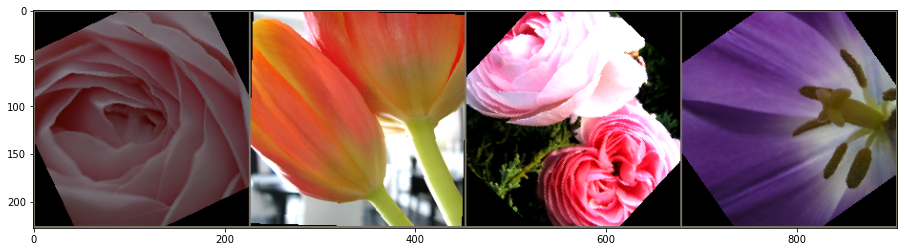

In [49]:
for images,labels in data_loader:
    break
    
print('labels:',labels.numpy())
print('images:',np.array([class_names[i] for i in labels]))


im = make_grid(images,nrow=4)

im_inv = transforms.Normalize( 
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225])
im = im_inv(im)
plt.figure(figsize =(20,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))